# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
X_norm = StandardScaler().fit_transform(X)

y = pd.Series(data["target"])

In [3]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
y.unique()

array([0, 1, 2])

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans_8 = KMeans(n_clusters=8, random_state=1)
kmeans_8.fit(X)
y_pred_k8 = kmeans_8.labels_

print(f'Kmeans model 8 clusters, silhouette_score {silhouette_score(X, y_pred_k8)}')

#data normalizada
kmeans_8n = KMeans(n_clusters=8, random_state=1)

kmeans_8n.fit(X_norm)

y_pred_k8n = kmeans_8n.labels_
print(f'Kmeans model 8 clusters (data norm), silhouette_score {silhouette_score(X, y_pred_k8n)}')

Kmeans model 8 clusters, silhouette_score 0.5406824747857625
Kmeans model 8 clusters (data norm), silhouette_score -0.1583407343586901


## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [6]:
kmeans_5 = KMeans(n_clusters=5, random_state=1)
kmeans_5.fit(X)
y_pred_k5 = kmeans_5.labels_

print(f'Kmeans model 5 clusters, silhouette_score {silhouette_score(X, y_pred_k5)}')

Kmeans model 5 clusters, silhouette_score 0.5489993239795691


## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [7]:
kmeans_3 = KMeans(n_clusters=3, random_state=1)
kmeans_3.fit(X)
y_pred_k3 = kmeans_3.labels_

print(f'Kmeans model 3 clusters, silhouette_score {silhouette_score(X, y_pred_k3)}')

Kmeans model 3 clusters, silhouette_score 0.5711381937868844


## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

In [8]:
from yellowbrick.cluster import KElbowVisualizer

C:\Users\Itzel\Documents\Software\Anaconda\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


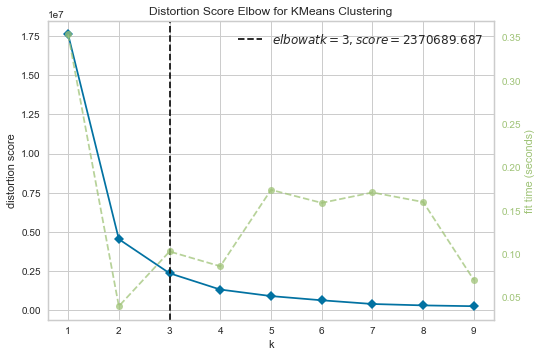

In [16]:
modelo = KMeans()
visual = KElbowVisualizer(modelo, k =(1,10))
visual.fit(X)
visual.poof();

Metric silhouette ________________________________


C:\Users\Itzel\Documents\Software\Anaconda\Anaconda\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Itzel\Documents\Software\Anaconda\Anaconda\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Itzel\Documents\Software\Anaconda\Anaconda\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


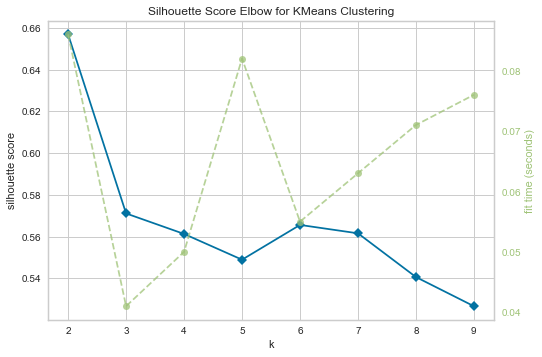

Metric calinski_harabasz ________________________________


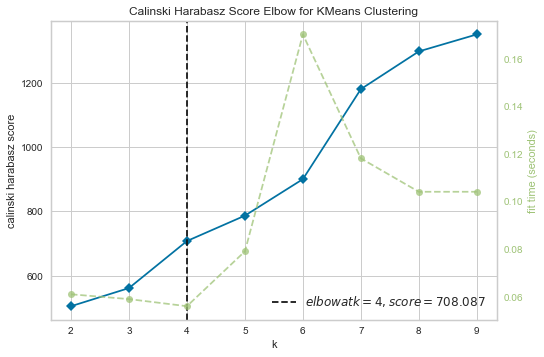

In [17]:
metrics = ['silhouette', 'calinski_harabasz' ]

for m in metrics:
    print(f'Metric {m} ________________________________')
    modelo = KMeans()
    visual = KElbowVisualizer(modelo, metric=m, k =(2,10))
    visual.fit(X)
    visual.poof();

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

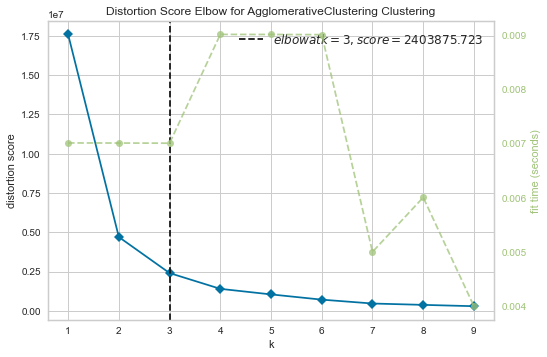

In [18]:
from sklearn.cluster import AgglomerativeClustering

modelo = AgglomerativeClustering()
visual = KElbowVisualizer(modelo, k =(1,10))
visual.fit(X)
visual.poof();

Metric silhouette ________________________________


C:\Users\Itzel\Documents\Software\Anaconda\Anaconda\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Itzel\Documents\Software\Anaconda\Anaconda\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Itzel\Documents\Software\Anaconda\Anaconda\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


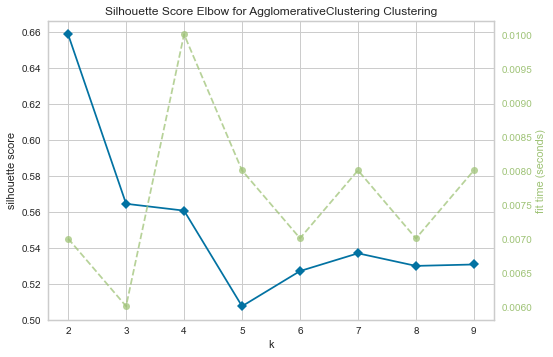

Metric calinski_harabasz ________________________________


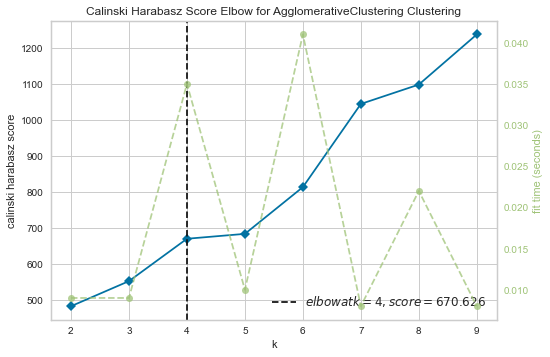

In [19]:
metrics = ['silhouette', 'calinski_harabasz' ]

for m in metrics:
    print(f'Metric {m} ________________________________')
    modelo = AgglomerativeClustering()
    visual = KElbowVisualizer(modelo, metric=m, k =(2,10))
    visual.fit(X)
    visual.poof();

In [11]:
# Usando la metrica por defecto, tanto para kmeans como AgglomerativeClustering, 
# la prueba del codo señala como número de clusters k=3

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [12]:
X1 = X.copy()
X1['labels_kmeans3'] = y_pred_k3

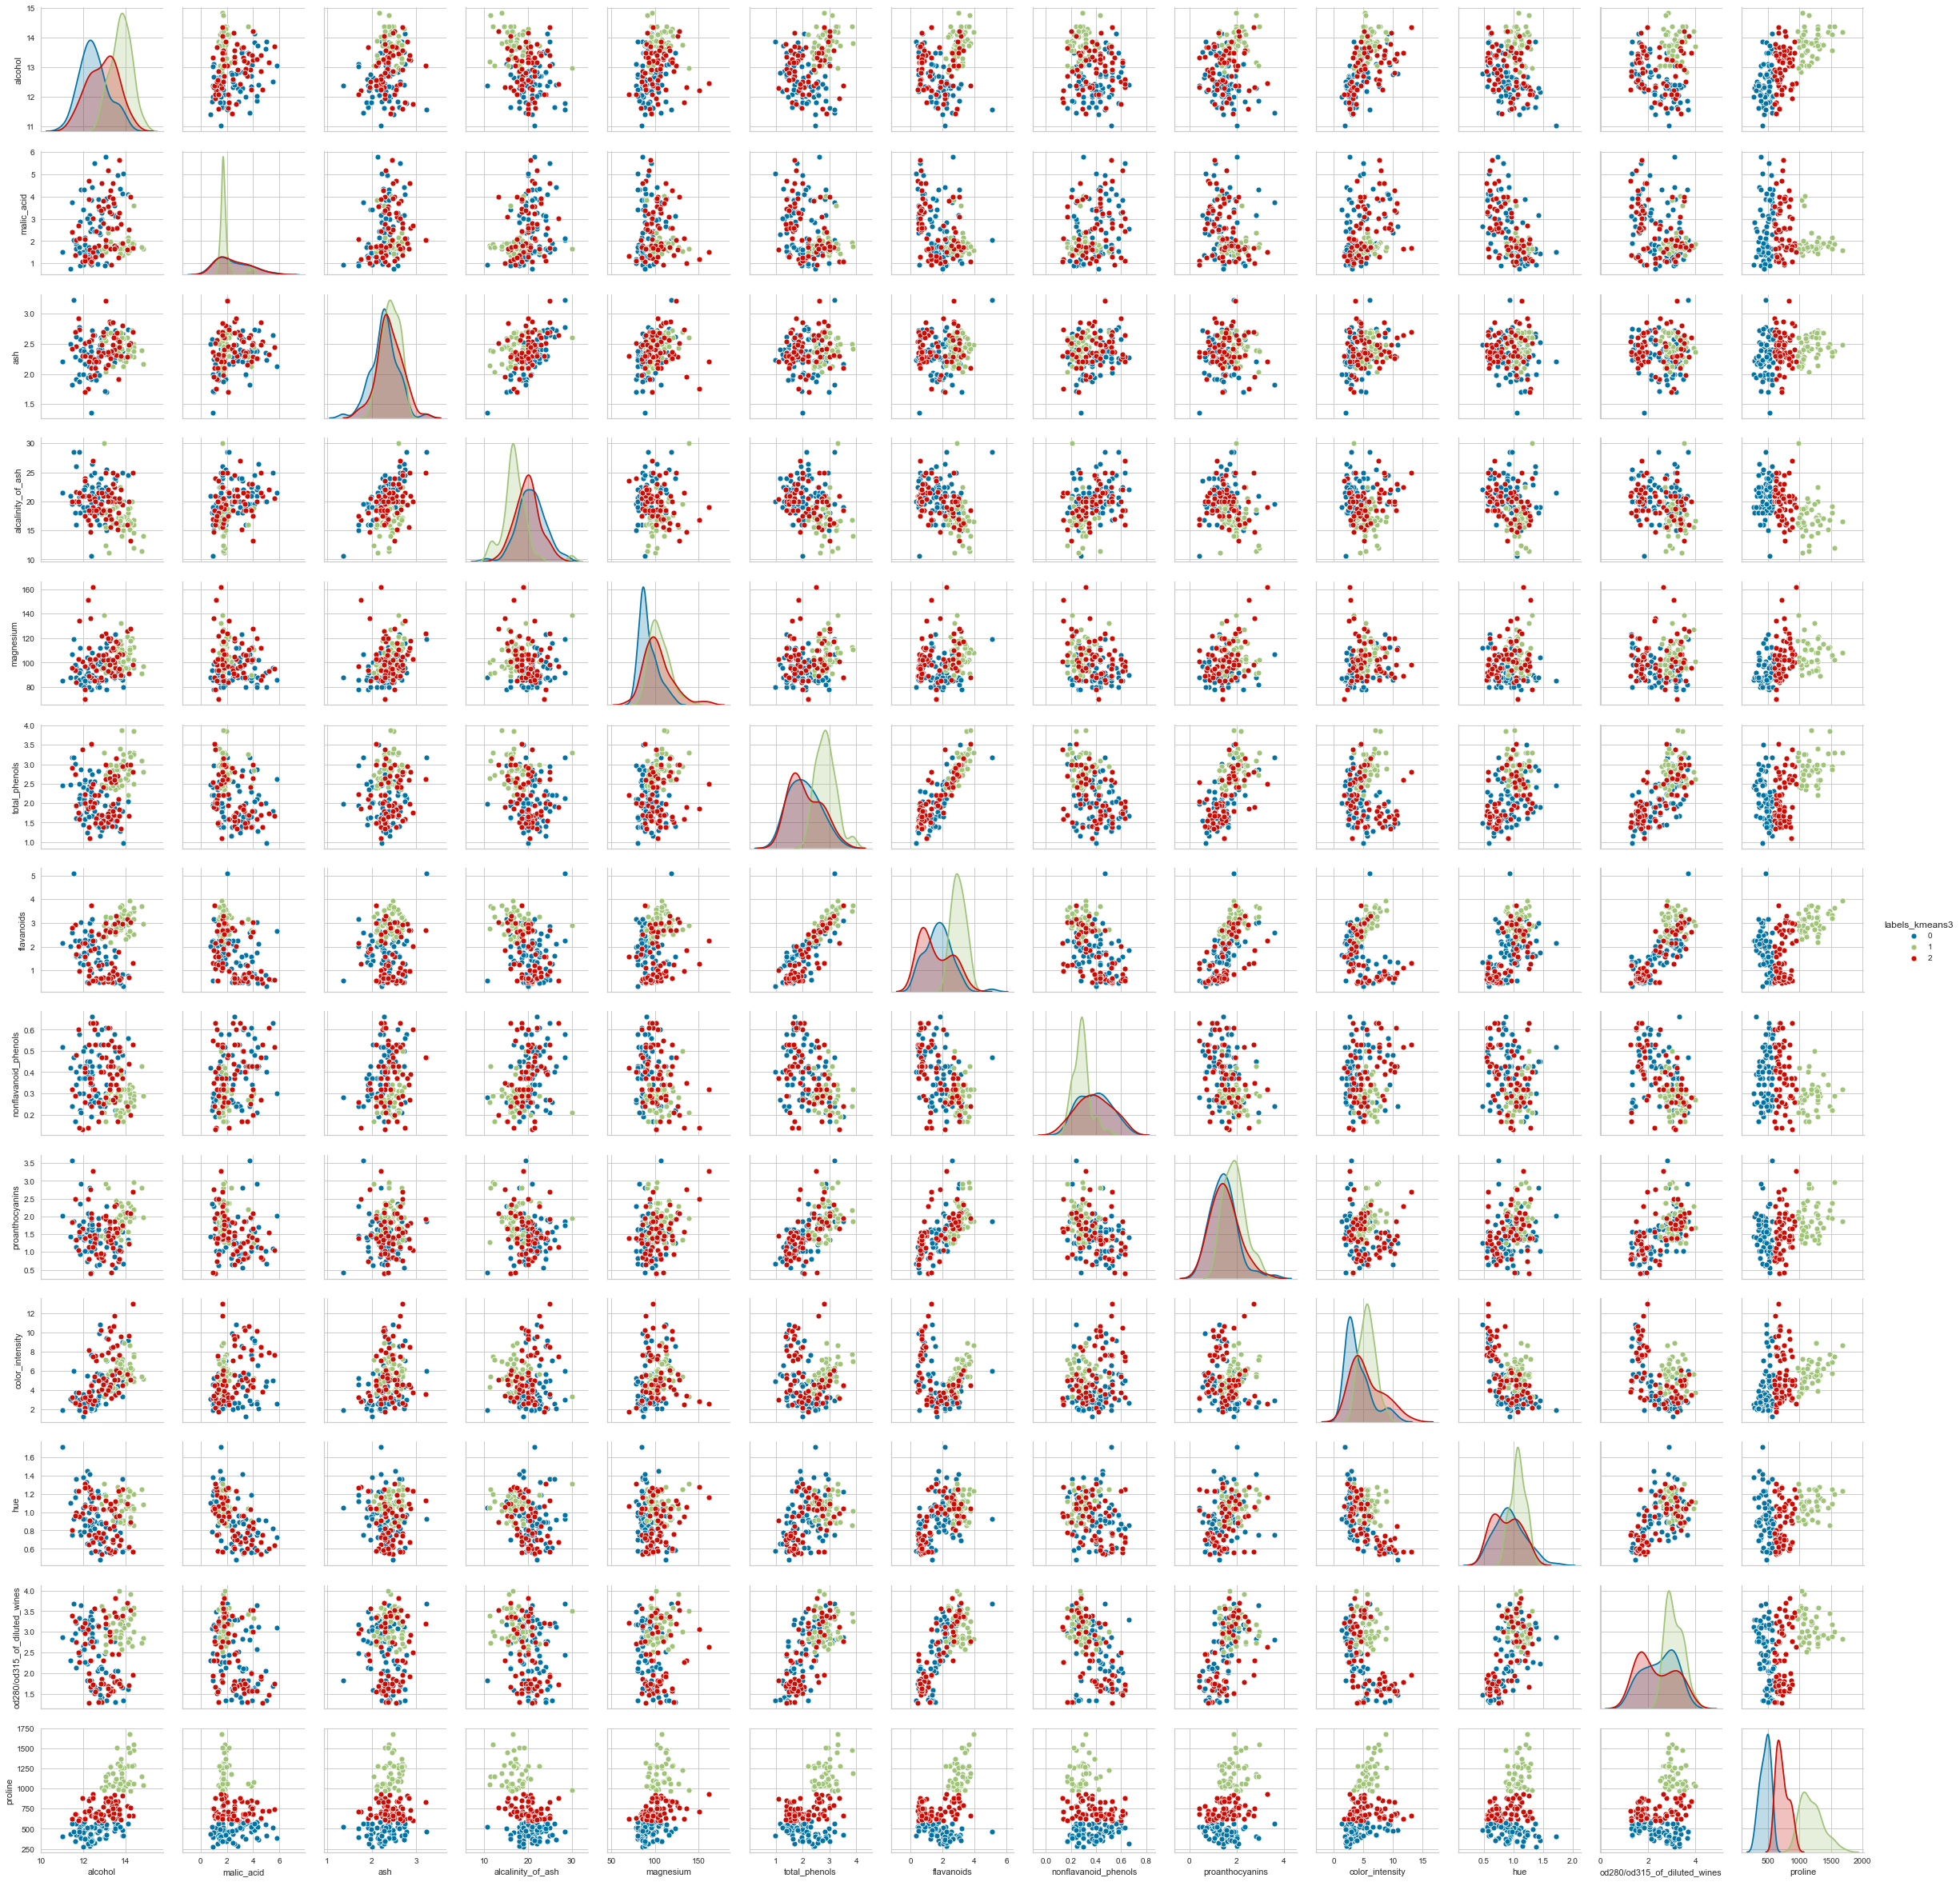

In [13]:
import seaborn as sns
sns.pairplot(X1, hue = 'labels_kmeans3');

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

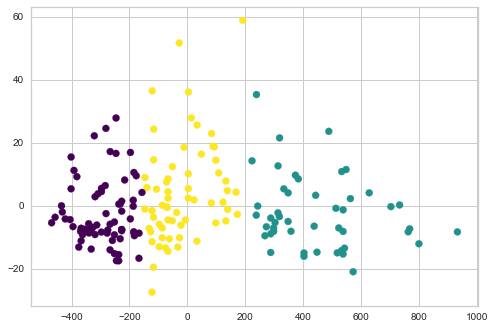

In [14]:
from sklearn.decomposition import PCA

pca = PCA().fit(X)
pca_X = pca.transform(X)

plt.scatter(pca_X[:,0],pca_X[:,1], c= y_pred_k3, cmap='viridis');

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

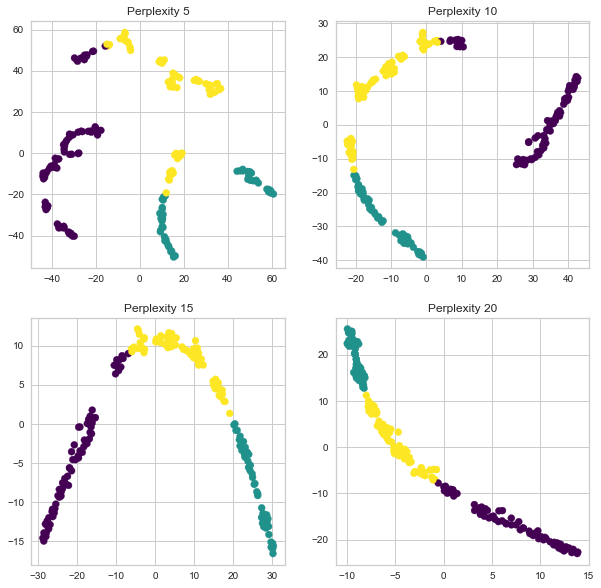

In [15]:
from sklearn.manifold import TSNE

fig, axes = plt.subplots(2,2,figsize=(10,10))
ax = [axis for r in axes for axis in r]

for i, perp in enumerate([5, 10, 15, 20]):
    tsne = TSNE(perplexity=perp)
    x_embedded = tsne.fit_transform(pca_X)
    ax[i].scatter(x_embedded[:, 0], x_embedded[:, 1], c= y_pred_k3, cmap='viridis')
    ax[i].set_title(f'Perplexity {perp}')
    
plt.show();